In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import matplotlib.pyplot as plt
from glob import glob
import pydicom
from pydicom.data import get_testdata_files 
import nibabel

"""
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
"""
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

"\nfor dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n"

In [2]:
train_df = pd.read_csv("../input/rsna-2022-cervical-spine-fracture-detection/train.csv")
print(train_df.head())
print(len(train_df))

            StudyInstanceUID  patient_overall  C1  C2  C3  C4  C5  C6  C7
0   1.2.826.0.1.3680043.6200                1   1   1   0   0   0   0   0
1  1.2.826.0.1.3680043.27262                1   0   1   0   0   0   0   0
2  1.2.826.0.1.3680043.21561                1   0   1   0   0   0   0   0
3  1.2.826.0.1.3680043.12351                0   0   0   0   0   0   0   0
4   1.2.826.0.1.3680043.1363                1   0   0   0   0   1   0   0
2019


In [3]:
print(len(os.listdir("../input/rsna-2022-cervical-spine-fracture-detection/train_images")))

2019


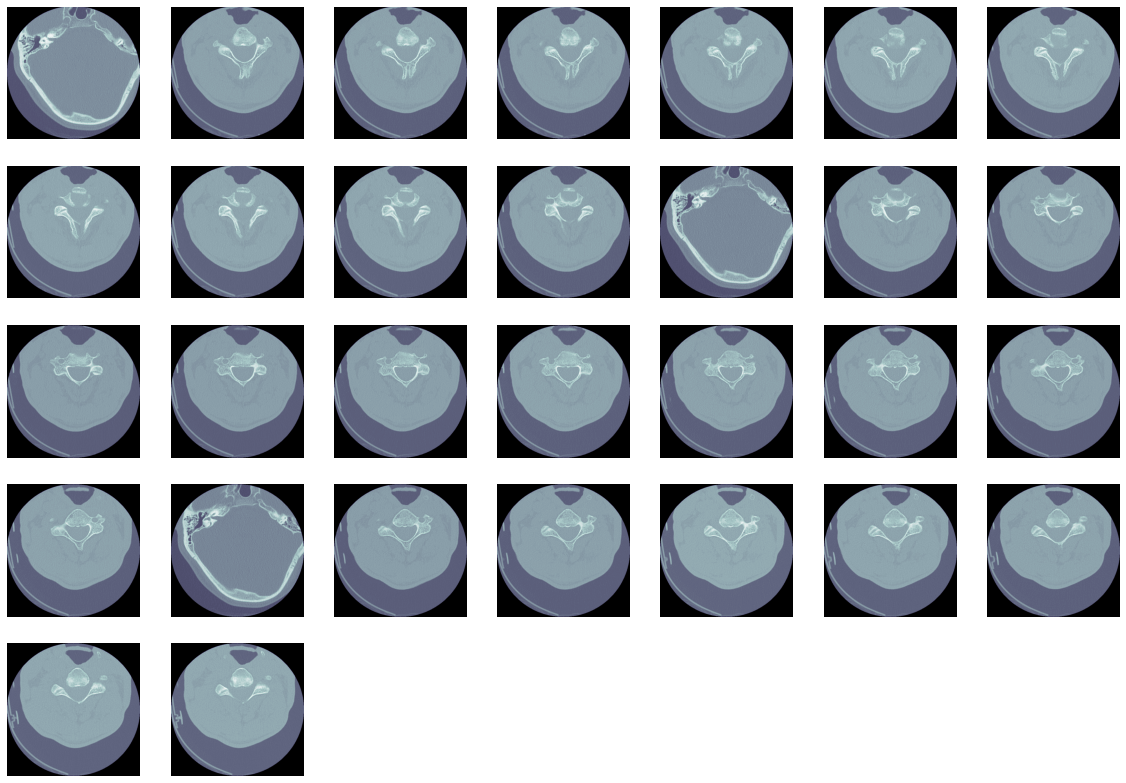

In [4]:
#filename = get_testdata_files()[0]
imageFolderPath = "../input/rsna-2022-cervical-spine-fracture-detection/train_images/1.2.826.0.1.3680043.10001"
imageFiles = sorted(glob(os.path.join(imageFolderPath, "*.dcm")))

numImageFiles = len(imageFiles)
columns = 7
rows = 7
plt.figure(figsize=(20,20))
for i in range(1, 30 + 1):
    
    plt.subplot(rows, columns, i)
    
    image_path = imageFiles[i]
    image = pydicom.dcmread(image_path)
    plt.axis('off')
    plt.imshow(image.pixel_array, cmap=plt.cm.bone)


(512, 512, 429)


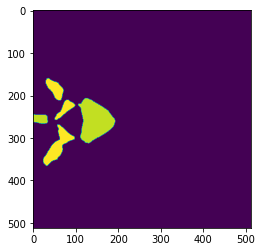

In [5]:
nibImagePath = "../input/rsna-2022-cervical-spine-fracture-detection/segmentations/1.2.826.0.1.3680043.10633.nii"
nii_img = nibabel.load(nibImagePath).get_fdata()
print(nii_img.shape)
nib_image = nii_img[:,:,1]
plt.imshow(nib_image)

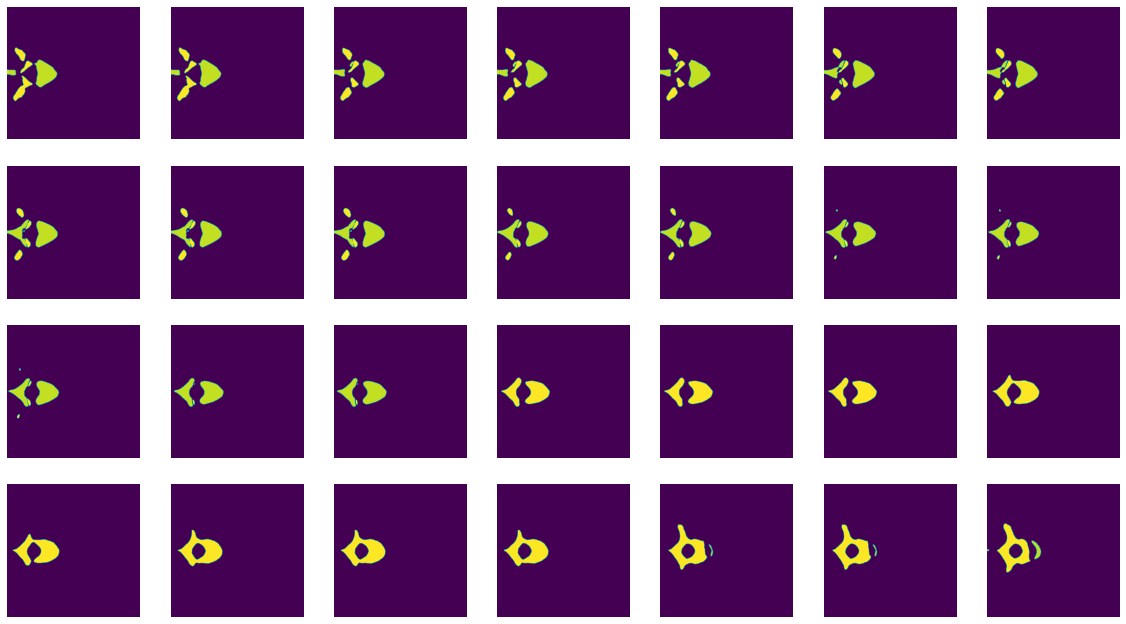

In [6]:
image_file = "../input/rsna-2022-cervical-spine-fracture-detection/segmentations/1.2.826.0.1.3680043.10633.nii"
plt.figure(figsize=(20, 20))
nii_img = nibabel.load(image_file).get_fdata()
for i in range(28):
    ax = plt.subplot(7, 7, i + 1)
    # specify your nii image pat
    nib_image = nii_img[:,:,i]
    plt.axis('off')
    plt.imshow(nib_image)

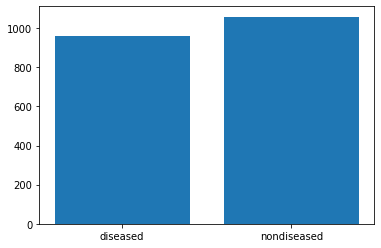

In [7]:
# Lets get an idea of how patient overall and no disease is distributed
lenTrainDf = len(train_df)
diseased = len(train_df.loc[train_df["patient_overall"] == 1])
noDiseased = lenTrainDf - diseased

plt.figure()
y = [diseased, noDiseased]
plt.bar(['diseased', 'nondiseased'], [diseased, noDiseased])
plt.show()


Hence we can see that both classes are quite balanced it is quite a balanced 

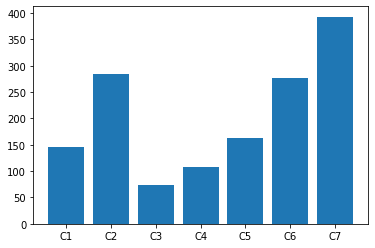

In [8]:
# Now let's see out of the diseased how is the distribution for different vertebraes
diseased = train_df.loc[train_df["patient_overall"] == 1]
C1 = len(diseased.loc[diseased["C1"] == 1])
C2 = len(diseased.loc[diseased["C2"] == 1])
C3 = len(diseased.loc[diseased["C3"] == 1])
C4 = len(diseased.loc[diseased["C4"] == 1])
C5 = len(diseased.loc[diseased["C5"] == 1])
C6 = len(diseased.loc[diseased["C6"] == 1])
C7 = len(diseased.loc[diseased["C7"] == 1])

plt.figure()
plt.bar(['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7'], [C1, C2, C3, C4, C5, C6, C7])
plt.show()